In [ ]:
# first cal PSNR for each image
from pathlib import Path
from utils import cal_metric
import nibabel as nib
import numpy as np
from monai.transforms import (
    Compose,
    CropForegroundd,
    EnsureChannelFirstd,
    Lambda,
    LoadImage,
    LoadImaged,
    SaveImage,
    ScaleIntensityRangePercentilesd,
)
transforms = Compose(
    [
        LoadImaged(keys=["image"]),
        EnsureChannelFirstd(keys=["image"]),
        ScaleIntensityRangePercentilesd(
            keys=["image"], lower=0.0, upper=100, b_min=0.0, b_max=1.0, clip=True
        ),
        Lambda(func=lambda x: x["image"]),
    ]
)

vol_name = "IXI002-Guys-0828"
seq = "T2"
factor=2
root = Path(
    # f"/root/aicp-data/IXI_downsampledx{int(factor)}_iacl/{vol_name}/{seq}.nii.gz"
    f"../IXI_dataset/IXI_downsampledx{int(factor)}_iacl/{vol_name}"
)
gt_path = root / 'T2_gt.nii.gz'
gt_data = transforms({"image": str(gt_path)})

for nii_path in Path('./results/IXI_256_ncsnpp_continuous_vpsde_gridSearch/').rglob('*.nii.gz'):
    data = transforms({"image": str(nii_path)})
    # print(data.shape) # (256, 256, 128)
    # assume the ground truth is in the same folder with name 'gt.nii.gz'
    

    psnr_val, ssim_val = cal_metric(data.squeeze(0).numpy(), gt_data.squeeze(0).numpy(), data_range=1.0)

    print(f'File: {nii_path}, PSNR: {psnr_val:.2f} dB, SSIM: {ssim_val:.4f}')

File: results/IXI_256_ncsnpp_continuous_vpsde_gridSearch/MRI_through_plane_SR_ADMM_TV_total/M_iter1/K_iter1/rho1.0/lambda0.02/AncestralSamplingPredictor/N50_noFinalConsistency/M_iter1_K_iter1_rho1.0_lambda0.02_AncestralSamplingPredictor_N50_noFinalConsistency.nii.gz.nii.gz, PSNR: 13.13 dB, SSIM: 0.6258
File: results/IXI_256_ncsnpp_continuous_vpsde_gridSearch/MRI_through_plane_SR_ADMM_TV_total/M_iter1/K_iter1/rho1.0/lambda0.08/AncestralSamplingPredictor/N50_noFinalConsistency/M_iter1_K_iter1_rho1.0_lambda0.08_AncestralSamplingPredictor_N50_noFinalConsistency.nii.gz.nii.gz, PSNR: 23.74 dB, SSIM: 0.6415
File: results/IXI_256_ncsnpp_continuous_vpsde_gridSearch/MRI_through_plane_SR_ADMM_TV_total/M_iter1/K_iter1/rho1.0/lambda0.005/AncestralSamplingPredictor/N50_noFinalConsistency/M_iter1_K_iter1_rho1.0_lambda0.005_AncestralSamplingPredictor_N50_noFinalConsistency.nii.gz.nii.gz, PSNR: 10.17 dB, SSIM: 0.3385
File: results/IXI_256_ncsnpp_continuous_vpsde_gridSearch/MRI_through_plane_SR_ADMM_TV_

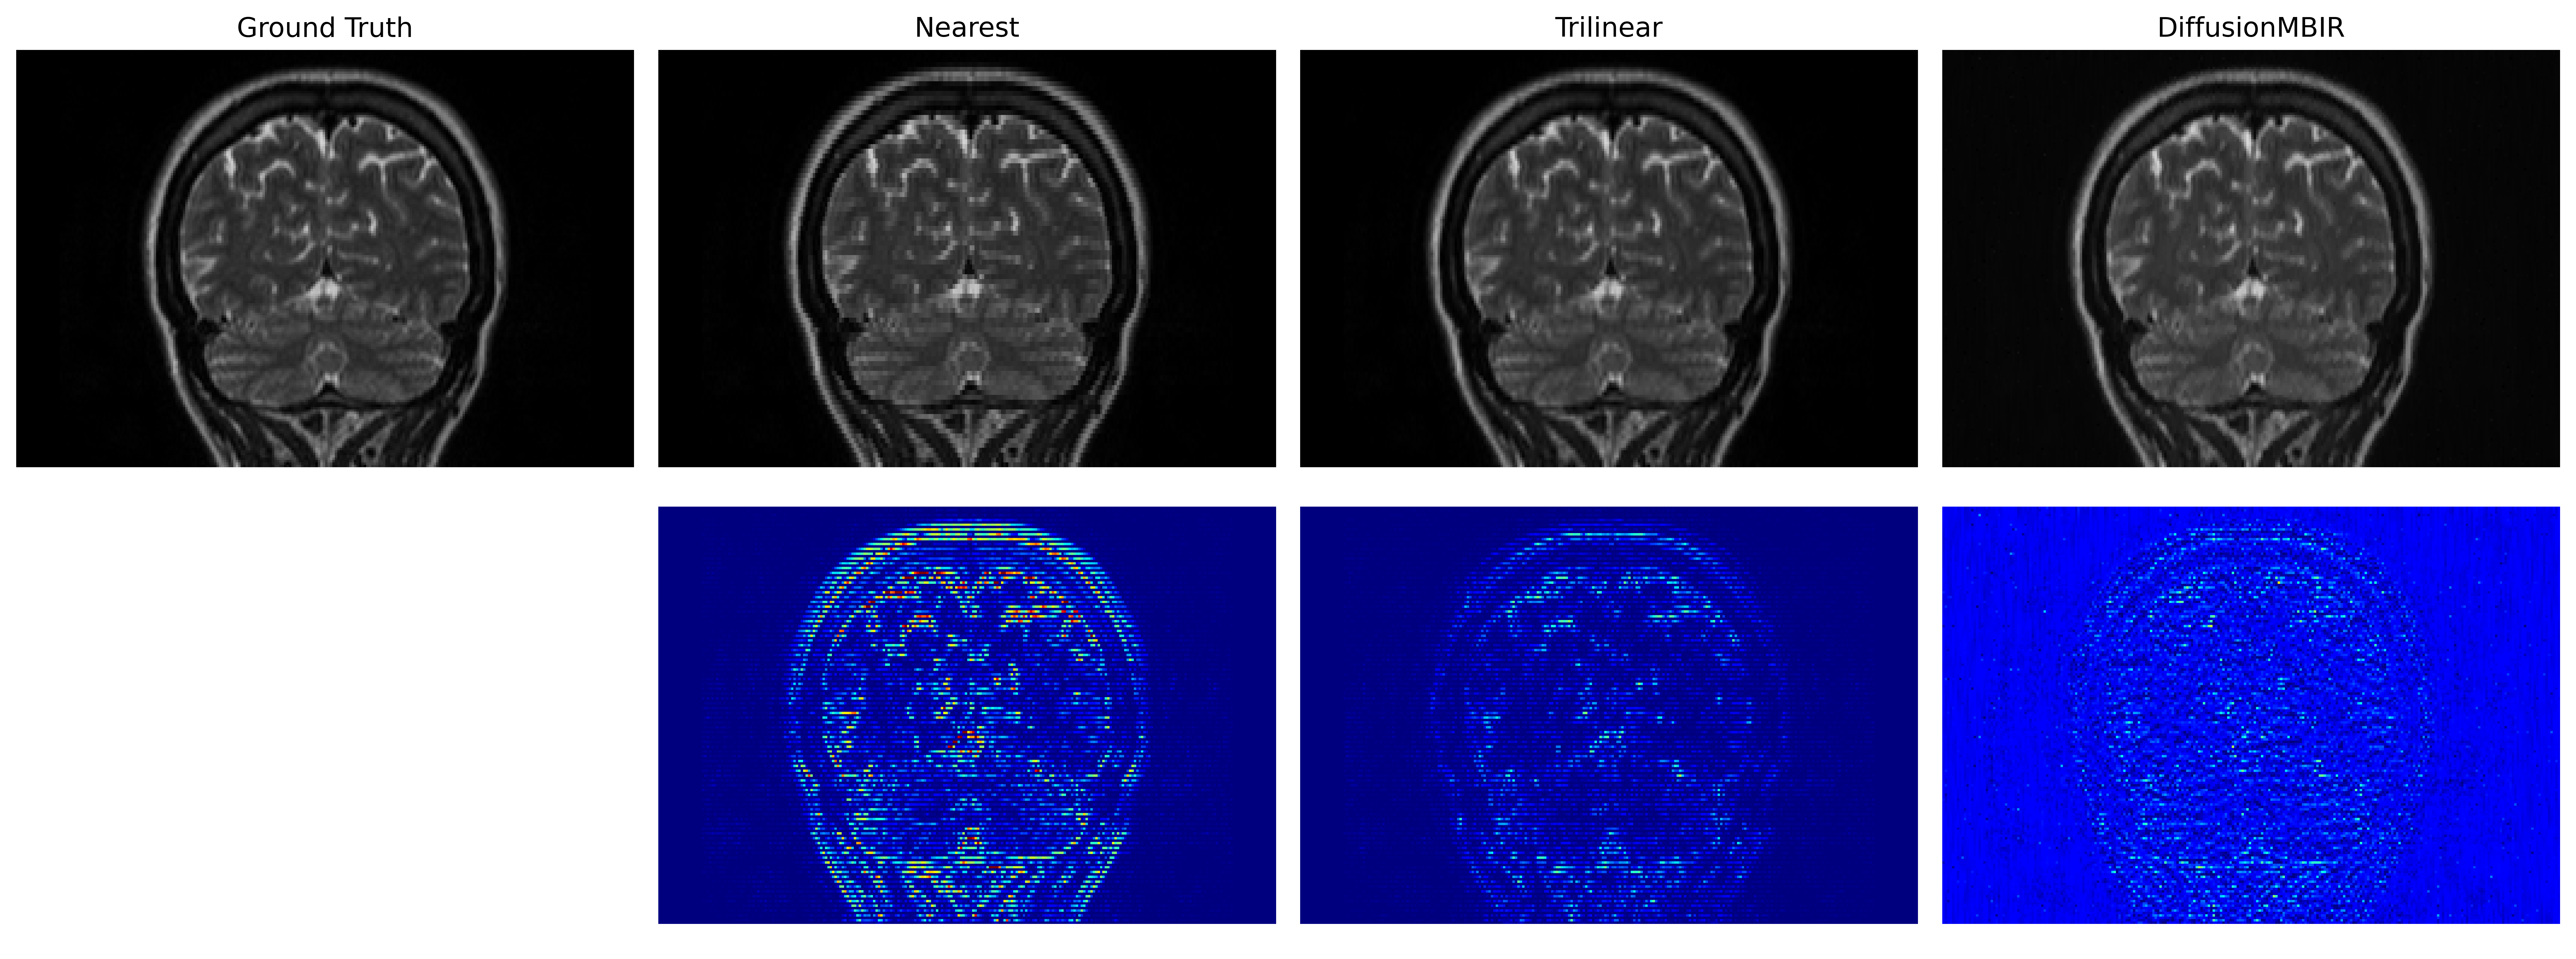

In [19]:
import matplotlib.pyplot as plt
transforms = Compose(
    [
        LoadImaged(keys=["image"]),
        EnsureChannelFirstd(keys=["image"]),
        ScaleIntensityRangePercentilesd(
            keys=["image"], lower=0.05, upper=100, b_min=0.0, b_max=1.0, clip=False
        ),
        Lambda(func=lambda x: x["image"]),
    ]
)
gt_path = root / 'T2_gt.nii.gz'
gt_data = transforms({"image": str(gt_path)})
DiffusionMBIR_path = "results/IXI_256_ncsnpp_continuous_vpsde_gridSearch/MRI_through_plane_SR_ADMM_TV_total/M_iter1/K_iter5/rho10.0/lambda0.01/AncestralSamplingPredictor/N50_noFinalConsistency/M_iter1_K_iter5_rho10.0_lambda0.01_AncestralSamplingPredictor_N50_noFinalConsistency.nii.gz.nii.gz"
DiffusionMBIR_data = transforms({"image": str(DiffusionMBIR_path)})
trilinear_path = "results/T2_interpolated.nii.gz.nii.gz"
trilinear_data = transforms({"image": str(trilinear_path)})
nearest_path = "results/T2_interpolated_nearest.nii.gz.nii.gz"
nearest_data = transforms({"image": str(nearest_path)})
# two row: imge, diff(jet)
fig, axs = plt.subplots(2, 4, figsize=(16, 6),dpi=600)
slice_idx = 64
vmin = 0
vmax = 1
im0 = axs[0, 0].imshow(gt_data.squeeze(0).numpy()[:,slice_idx, ::-1].T, cmap='gray', vmin=vmin, vmax=vmax)
axs[0, 0].set_title('Ground Truth')
axs[0, 0].axis('off')
im1 = axs[0, 1].imshow(nearest_data.squeeze(0).numpy()[:,slice_idx, ::-1].T, cmap='gray', vmin=vmin, vmax=vmax)
axs[0, 1].set_title('Nearest')
axs[0, 1].axis('off')
im1 = axs[0, 2].imshow(trilinear_data.squeeze(0).numpy()[:,slice_idx, ::-1].T, cmap='gray', vmin=vmin, vmax=vmax)
axs[0, 2].set_title('Trilinear')
axs[0, 2].axis('off')
im3 = axs[0, 3].imshow(DiffusionMBIR_data.squeeze(0).numpy()[:,slice_idx, ::-1].T, cmap='gray', vmin=vmin, vmax=vmax)
axs[0, 3].set_title('DiffusionMBIR')
axs[0, 3].axis('off')
# diff images
vmin = 0
vmax = 0.2
axs[1, 0].axis('off')
im4 = axs[1, 1].imshow(np.abs(gt_data.squeeze(0).numpy()[:,slice_idx, ::-1].T - nearest_data.squeeze(0).numpy()[:,slice_idx, ::-1].T), cmap='jet', vmin=vmin, vmax=vmax)

axs[1, 1].axis('off')
im5 = axs[1, 2].imshow(np.abs(gt_data.squeeze(0).numpy()[:,slice_idx, ::-1].T - trilinear_data.squeeze(0).numpy()[:,slice_idx, ::-1].T), cmap='jet', vmin=vmin, vmax=vmax)

axs[1, 2].axis('off')
im6 = axs[1, 3].imshow(np.abs(gt_data.squeeze(0).numpy()[:,slice_idx, ::-1].T - DiffusionMBIR_data.squeeze(0).numpy()[:,slice_idx, ::-1].T), cmap='jet', vmin=vmin, vmax=vmax)

axs[1, 3].axis('off')
plt.tight_layout()
plt.savefig('IXI_T2_SR_visualization.png', bbox_inches='tight')
